# Project: Car Price Prediction using Linear Regression

# Importing Important libraries

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Read the dataset

In [2]:
A = pd.read_csv("C:/Users/JOHN/Downloads/Cars93.csv")
A.head(7)

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre


In [3]:
A.columns = ['id', 'Manufacturer', 'Model', 'Type', 'MinPrice', 'Price',
       'MaxPrice', 'MPGcity', 'MPGhighway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Revpermile',
       'Mantransavail', 'Fueltankcapacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turncircle', 'Rearseatroom', 'Luggageroom',
       'Weight', 'Origin', 'Make']

In [4]:
A.shape

(93, 28)

# Drop Unneccessary columns which has no Statistical importance or contains uniques values

In [5]:
A = A.drop(labels=["id","Make","Model","Manufacturer"],axis=1)
# id,Make,Model,Manufacturer contains a lot of unique values that's why we will drop them

# Treat with missing data

In [6]:
A.isna().sum()

Type                 0
MinPrice             0
Price                0
MaxPrice             0
MPGcity              0
MPGhighway           0
AirBags              4
DriveTrain           0
Cylinders            0
EngineSize           0
Horsepower           0
RPM                  0
Revpermile           0
Mantransavail        0
Fueltankcapacity     0
Passengers           0
Length               0
Wheelbase            0
Width                0
Turncircle           0
Rearseatroom         2
Luggageroom         11
Weight               0
Origin               0
dtype: int64

In [7]:
for i in A.columns:
    if(A[i].dtypes == 'object'):
        x = A[i].mode()[0]
        A[i] = A[i].fillna(x) # categorical columns's missing data replace with mode of categorical column.
    else:
        x = A[i].mean()
        A[i] = A[i].fillna(x)# continuous columns's missing data replace with mean of continuous column.

In [8]:
A.isna().sum() # missing data has gone

Type                0
MinPrice            0
Price               0
MaxPrice            0
MPGcity             0
MPGhighway          0
AirBags             0
DriveTrain          0
Cylinders           0
EngineSize          0
Horsepower          0
RPM                 0
Revpermile          0
Mantransavail       0
Fueltankcapacity    0
Passengers          0
Length              0
Wheelbase           0
Width               0
Turncircle          0
Rearseatroom        0
Luggageroom         0
Weight              0
Origin              0
dtype: int64

# define Temporary X columns

In [9]:
Y = A[["Price"]]
X = A.drop(labels=["Price"],axis=1)

# Exploretary data analysis (EDA)

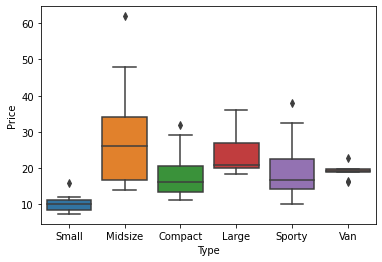

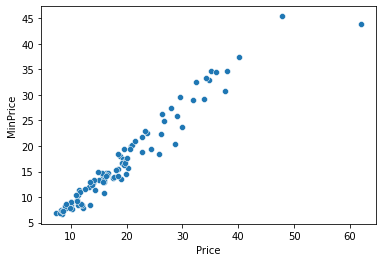

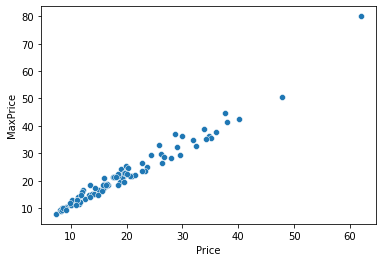

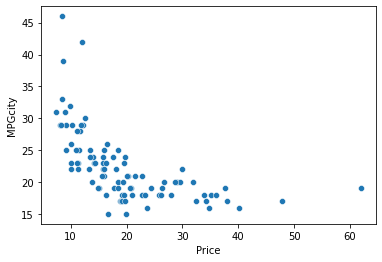

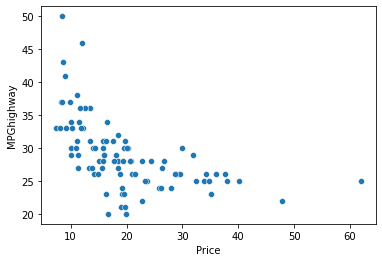

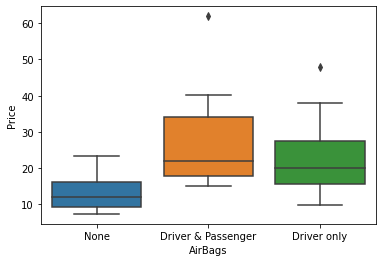

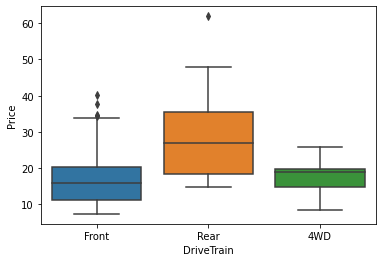

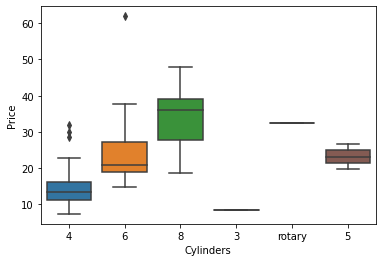

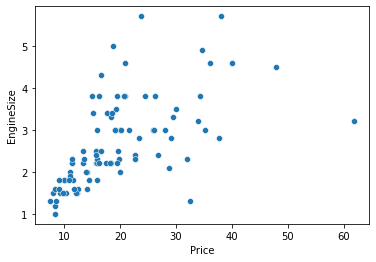

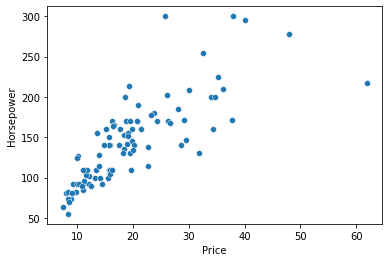

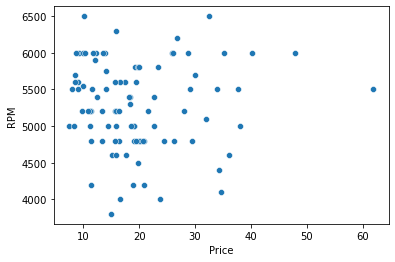

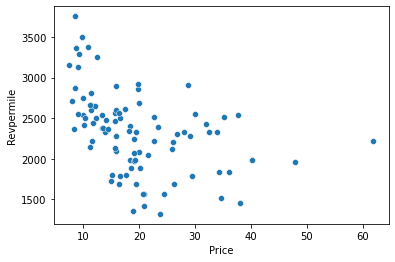

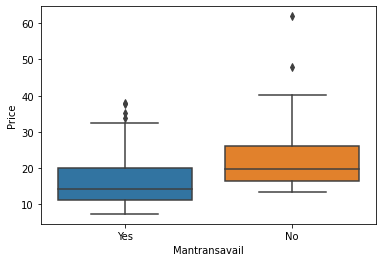

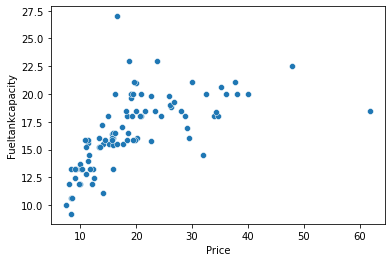

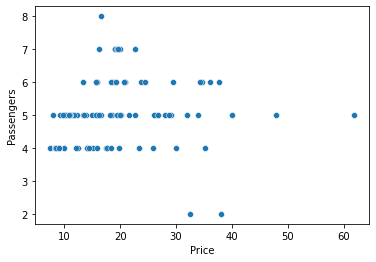

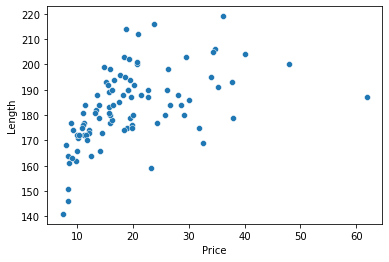

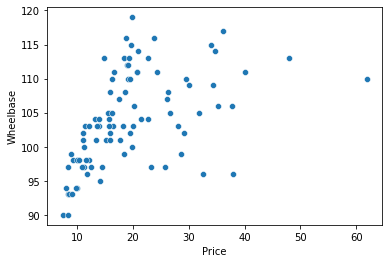

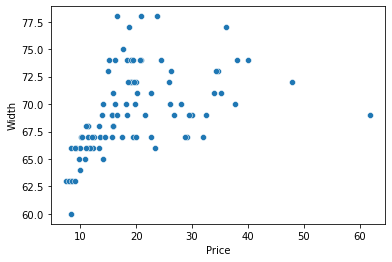

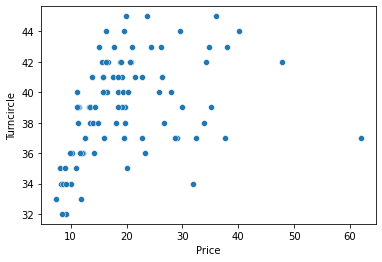

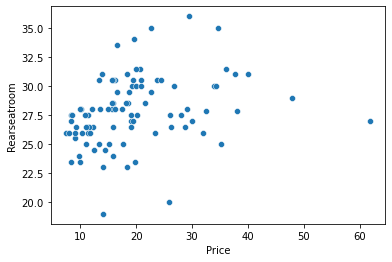

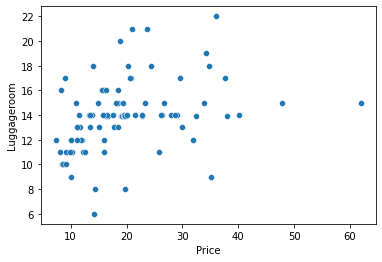

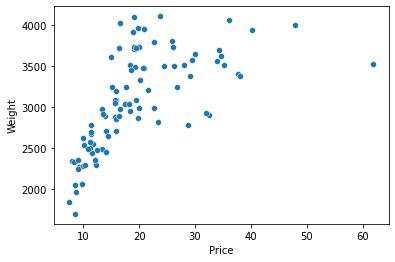

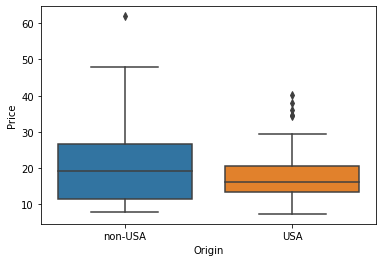

In [10]:
for i in X.columns:
    if(X[i].dtypes == 'object'):
        sb.boxplot(X[i],Y.Price)
        plt.show()
    else:
        sb.scatterplot(Y.Price,X[i])
        plt.show()

check for skew

In [11]:
A.skew()

MinPrice            1.182989
Price               1.533082
MaxPrice            2.033859
MPGcity             1.704430
MPGhighway          1.229897
EngineSize          0.859418
Horsepower          0.951728
RPM                -0.258533
Revpermile          0.281546
Fueltankcapacity    0.108146
Passengers          0.062517
Length             -0.090095
Wheelbase           0.113727
Width               0.264027
Turncircle         -0.133569
Rearseatroom        0.079086
Luggageroom         0.243936
Weight             -0.143669
dtype: float64

In [12]:
np.log(A.skew())

MinPrice            0.168044
Price               0.427280
MaxPrice            0.709935
MPGcity             0.533231
MPGhighway          0.206930
EngineSize         -0.151499
Horsepower         -0.049476
RPM                      NaN
Revpermile         -1.267459
Fueltankcapacity   -2.224271
Passengers         -2.772319
Length                   NaN
Wheelbase          -2.173956
Width              -1.331702
Turncircle               NaN
Rearseatroom       -2.537219
Luggageroom        -1.410849
Weight                   NaN
dtype: float64

# Features selection 

In [13]:
Y = A[["Price"]]
Y.head()
X = A.drop(["Price"],axis=1)

In [14]:
A.corr()[["Price"]].sort_values(by = ["Price"],ascending=False)

,Price
Price,1.000000
MaxPrice,0.981580
MinPrice,0.970601
Horsepower,0.788218
Weight,0.647179
Fueltankcapacity,0.619480
EngineSize,0.597425
Length,0.503628
Wheelbase,0.500864
Width,0.456028


In [15]:
imp_con_columns = ['MaxPrice', 'MinPrice', 'Horsepower', 'Weight', 'Fueltankcapacity',
       'EngineSize', 'MPGhighway', 'MPGcity']

In [16]:
imp_con_columns #important continuous columns

['MaxPrice',
 'MinPrice',
 'Horsepower',
 'Weight',
 'Fueltankcapacity',
 'EngineSize',
 'MPGhighway',
 'MPGcity']

# Anova Test

In [17]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes == 'object'):
        cat.append(i)
    else:
        con.append(i)


In [18]:
def ANOVA(con,cat,df) :
    from pandas import DataFrame
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    anova_result = anova_lm(model)
    a = anova_result[["PR(>F)"]].values[0][0]
    return round(a,4)


In [19]:
imp_cat_columns = []
for i in X[cat].columns:
    x =  ANOVA("Price",i,A)
    if(x < 0.05):
        imp_cat_columns.append(i)
        print("Price vs",i," = ",x)

Price vs Type  =  0.0
Price vs AirBags  =  0.0
Price vs DriveTrain  =  0.0
Price vs Cylinders  =  0.0
Price vs Mantransavail  =  0.0014


In [20]:
imp_cat_columns

['Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Mantransavail']

In [21]:
imp_con_columns

['MaxPrice',
 'MinPrice',
 'Horsepower',
 'Weight',
 'Fueltankcapacity',
 'EngineSize',
 'MPGhighway',
 'MPGcity']

In [22]:
X[imp_con_columns] #data is not Standarize format , we need to Standerize the data

,MaxPrice,MinPrice,Horsepower,Weight,Fueltankcapacity,EngineSize,MPGhighway,MPGcity
0,18.8,12.9,140,2705,13.2,1.8,31,25
1,38.7,29.2,200,3560,18.0,3.2,25,18
2,32.3,25.9,172,3375,16.9,2.8,26,20
3,44.6,30.8,172,3405,21.1,2.8,26,19
4,36.2,23.7,208,3640,21.1,3.5,30,22
...,...,...,...,...,...,...,...,...
88,22.7,16.6,109,3960,21.1,2.5,21,17
89,22.4,17.6,134,2985,18.5,2.0,30,21
90,23.7,22.9,178,2810,18.5,2.8,25,18
91,23.5,21.8,114,2985,15.8,2.3,28,21


# Preprocessing

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x1 = pd.DataFrame(ss.fit_transform(X[imp_con_columns]),columns=imp_con_columns)
x2 = pd.get_dummies(X[imp_cat_columns])

# Removing Outliers

In [24]:
T = []
for i in x1.columns:
    T.extend(x1[(x1[i] > 3) | ( x1[i] < -3)].index)

In [25]:
T

[58, 47, 58, 16, 38, 41, 38, 41]

In [26]:
outliers = np.unique(T)
x1 = x1.drop(index=outliers,axis=0)
Y = Y.drop(index=outliers,axis=0)

# This is new and Updated Independent Variable

In [27]:
Xnew = x1.join(x2)
print(Xnew.shape, "\n",Y.shape)

(88, 28) 
 (88, 1)


# Divide data into training and testing set

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# Create a Linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(xtrain,ytrain)
train_pred = model.predict(xtrain)
test_pred = model.predict(xtest)

In [30]:
from sklearn.metrics import mean_absolute_error
train_error = round(mean_absolute_error(ytrain,train_pred),4)
test_error = round(mean_absolute_error(ytest,test_pred),4)
print("trainning error: ",train_error,"\n\n","testing error: ", test_error)

trainning error:  0.0161 

 testing error:  0.0431


In [31]:
# the model is performing slightly overfiting that means this is very good model

In [32]:
from sklearn.metrics import explained_variance_score
explained_variance_score(ytest,test_pred)

0.9999528111040739

In [33]:
# Expalined variance is very good, That means the model has more reliable.